In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rc

In [3]:

def get_data_list(metric,day,data_source,data_df):
    directory = 'outputs'
    for f in os.listdir(directory):
        if metric in f and day in f and data_source in f:
            df = pd.read_csv(directory+'/'+f,index_col=0)
            
            df = pd.DataFrame(np.abs(df.values),columns=df.columns if len(df.columns)>2 else [metric])
            if len(df.columns)<2 and 'TRM' in df.columns:
                print('error')
            graph_n = f.replace(metric+'_'+day,'').replace(data_source+'.csv','')
            if graph_n in data_df[data_df.source == data_source].graph.values:
                start_ind = list((data_df.source == data_source) & (data_df.graph == graph_n)).index(True)
                if df.shape[1]>1:
                    for i in range(5):
                        for j in range(5):
                            data_df.iloc[start_ind+j,i+int(metric=='runtimes')*5] = df.iloc[j,i]
                else:
                    for j in range(5):
                        data_df.iloc[start_ind+j,list(data_df.columns).index(metric)] = df.iloc[j,0]
            else:
                df['graph'] = [graph_n]*df.shape[0]
                df['epsilon'] = [1,.8,.6,.4,.2]
                df['source'] = [data_source]*5
                df['day'] = [day]*5
                if df.shape[1]>6:
                    
                    df.columns = [col for col in data_df.columns if metric in col]+['graph','epsilon','source','day']
                    for col in data_df.columns:
                        if not (col in df.columns):
                            df[col] = [np.nan]*5
                data_df = data_df.append(df,ignore_index=True)
   
            
    return data_df



In [4]:
'scores' in 'TRM_scores'

True

In [5]:
sources = ['citi','capital','blue']
score_cols = ['TRM_scores','Local Ratio_scores', 'HS_scores', 'GHS_scores', 'IHS_scores']
rt_cols = ['TRM_runtimes','Local Ratio_runtimes', 'HS_runtimes',  'GHS_runtimes', 'IHS_runtimes']
df = pd.DataFrame(columns=score_cols+ rt_cols+['graph','graphs','epsilon','sdists','source'],)
for metric in ['sdists','graphs','runtimes','scores']:
    for day in ['weekend','weekday']:
        for source in sources:
            df=get_data_list(metric,day,source,df)
for col in score_cols+rt_cols+['epsilon']:
    df[col]=pd.to_numeric(df[col])
df

,TRM_scores,Local Ratio_scores,HS_scores,GHS_scores,IHS_scores,TRM_runtimes,Local Ratio_runtimes,HS_runtimes,GHS_runtimes,IHS_runtimes,graph,graphs,epsilon,sdists,source,day
0,692346.285186,685250.300685,687213.350282,689755.663480,691124.589140,0.310628,129.335505,6.022776,69.637611,2.434401,2,298,1.0,633087.699468,citi,weekend
1,569231.137251,563855.507564,560947.762787,566514.724369,567728.334120,0.212604,87.586148,4.944565,106.026756,2.712350,2,262,0.8,516530.137038,citi,weekend
2,433748.614372,429050.626577,433081.010181,426347.443753,429624.613137,0.147702,60.896773,2.991396,59.131935,1.595760,2,226,0.6,390525.198111,citi,weekend
3,323371.943605,313739.918551,310963.296698,318778.236008,316892.549309,0.093535,35.674491,4.666044,37.211468,3.560343,2,190,0.4,259643.386418,citi,weekend
4,170811.867832,164782.548149,168224.663667,165611.066005,165557.277162,0.050584,12.713381,0.959369,33.484937,0.990126,2,154,0.2,152514.367399,citi,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,502660.973410,498093.778061,499276.584920,498277.067953,497578.214393,0.286891,153.318152,5.132345,108.649276,4.354076,16,292,1.0,446531.696772,blue,weekday
326,417952.468297,411221.645173,413865.878409,409355.037623,415528.631963,0.200980,107.214951,4.982202,90.496734,4.436379,16,260,0.8,364358.949781,blue,weekday
327,337289.171241,329373.373462,336516.180930,331420.409052,332553.096310,0.144896,70.603168,4.061845,87.389458,3.686560,16,228,0.6,275231.412013,blue,weekday
328,229872.909753,253188.554320,224714.031642,224662.737422,224587.116181,0.090407,46.265996,5.642124,61.335098,2.473492,16,196,0.4,178917.327364,blue,weekday


In [6]:
def get_det_group(source,day):
    capit_we = df.loc[(df.source==source) & (df.day==day),:].copy()
    df_temp = pd.DataFrame()
    det_cols = []
    for c in score_cols:
        det_col = c.split('_')[0]+'_det'
        det_cols.append(det_col)
        df_temp[det_col] = pd.to_numeric(arg=(capit_we[c].values-capit_we['sdists'].values)/capit_we['sdists'].values)
    df_temp['epsilon'] = capit_we.epsilon.values
    return df_temp, det_cols


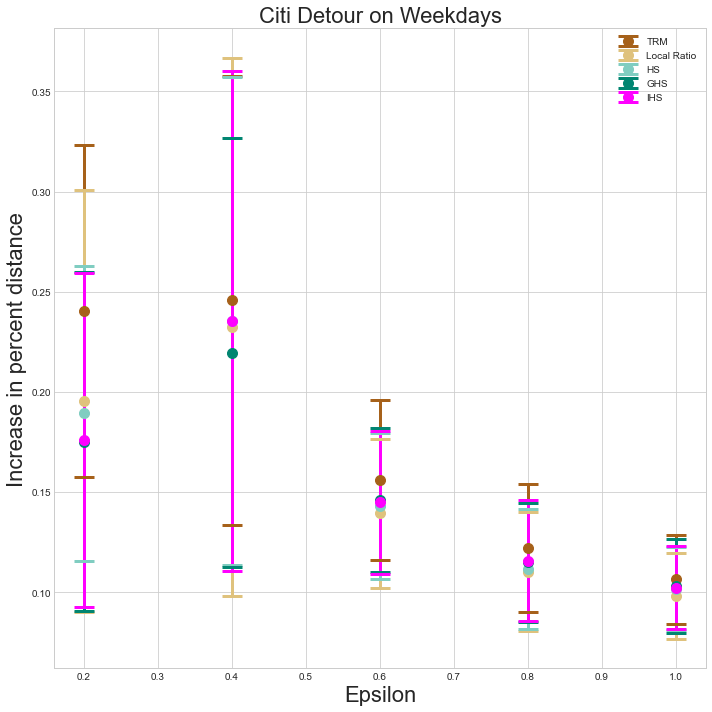

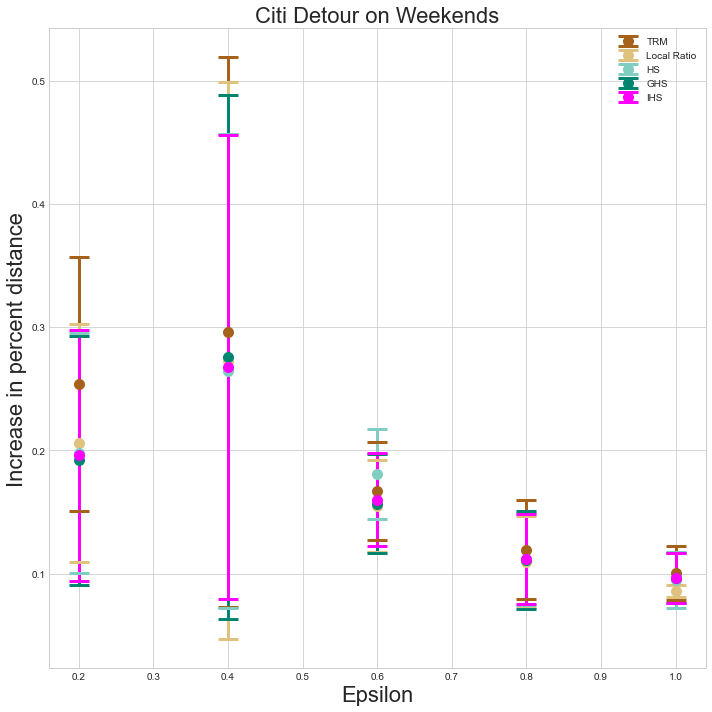

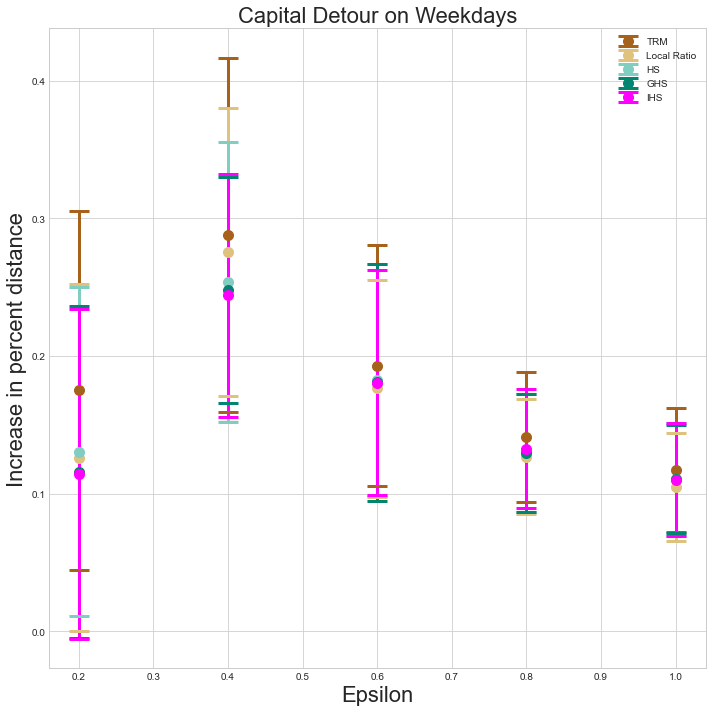

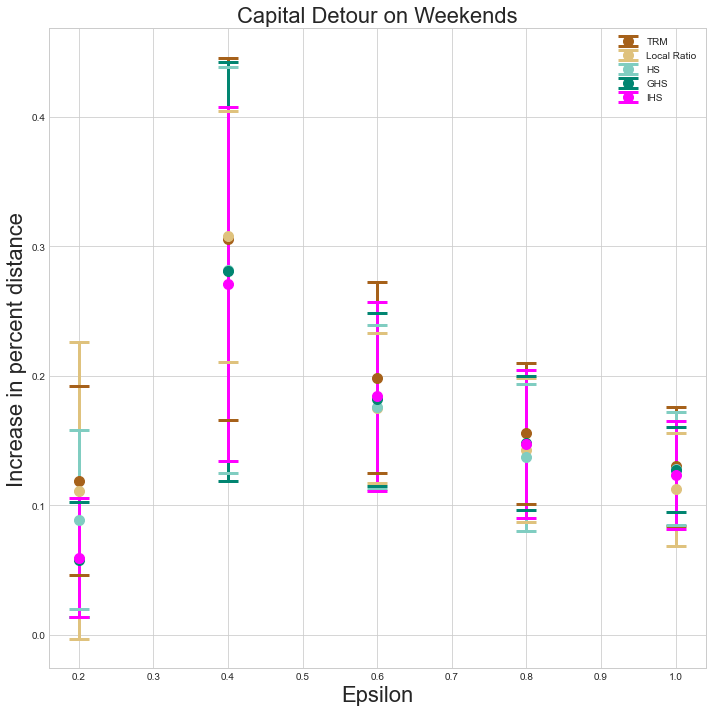

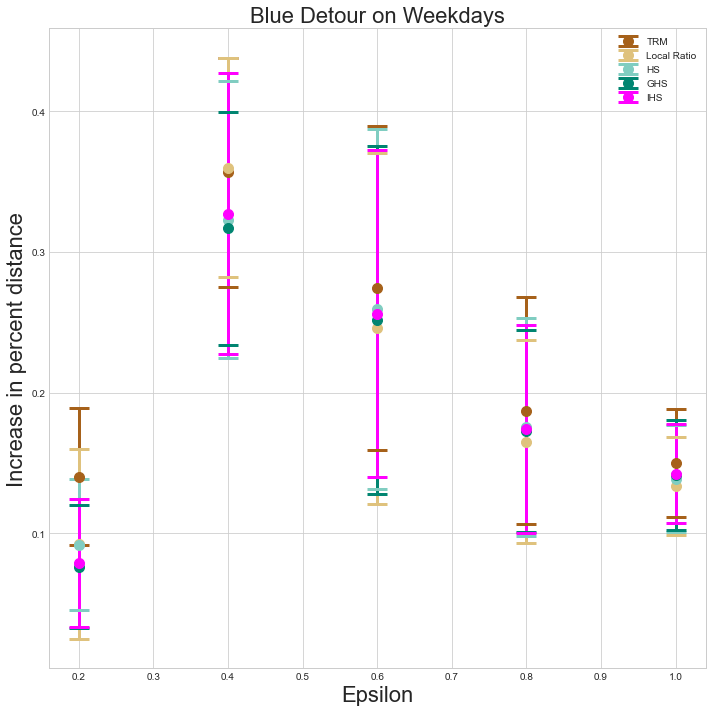

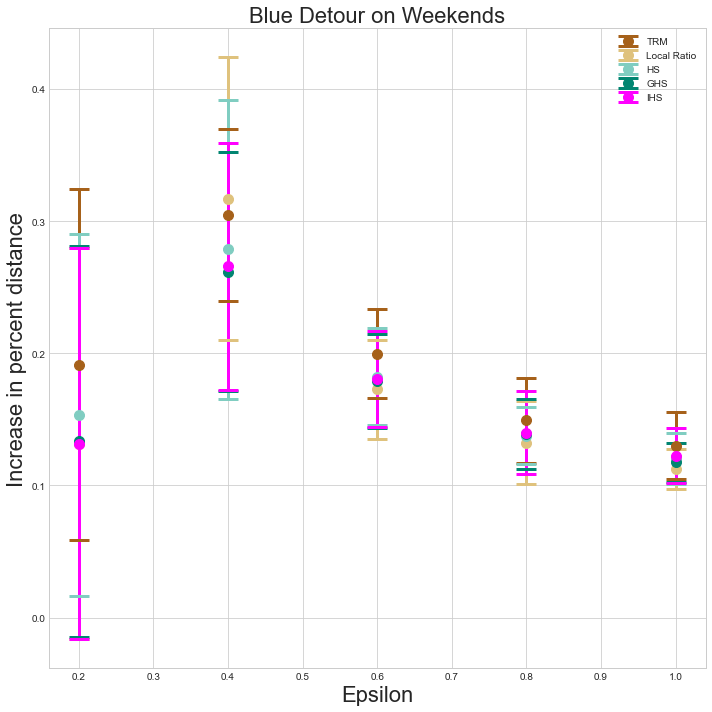

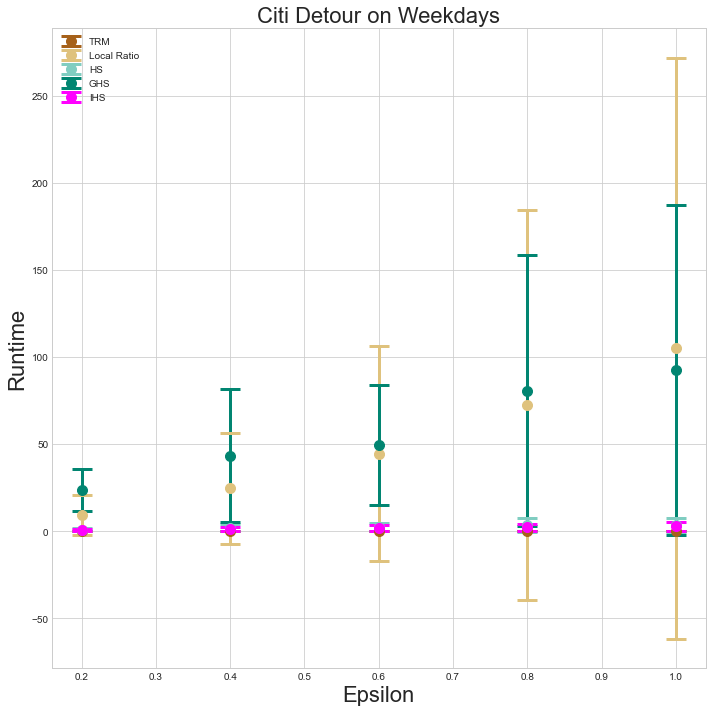

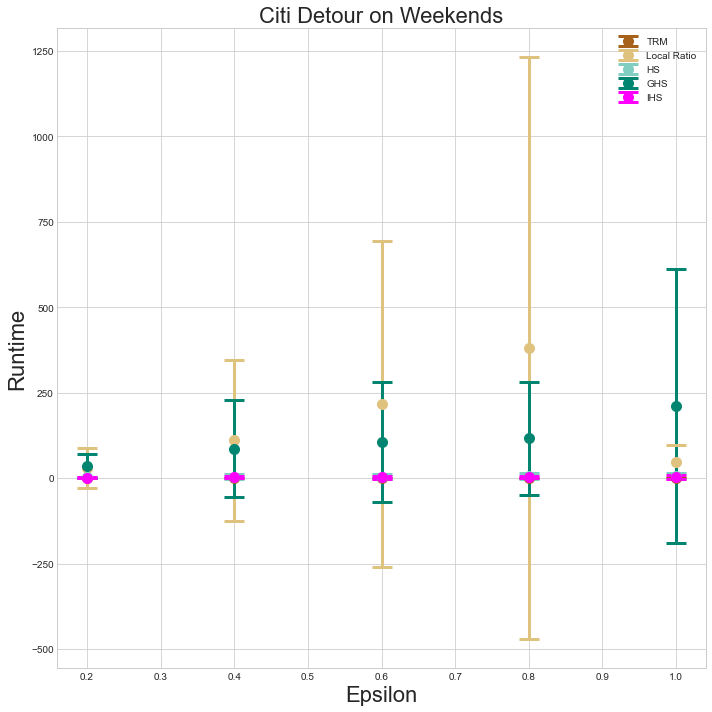

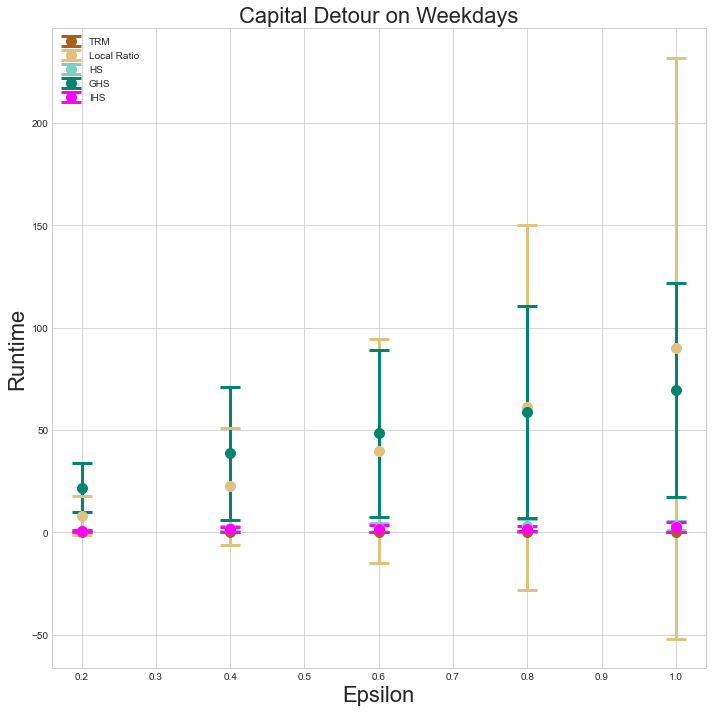

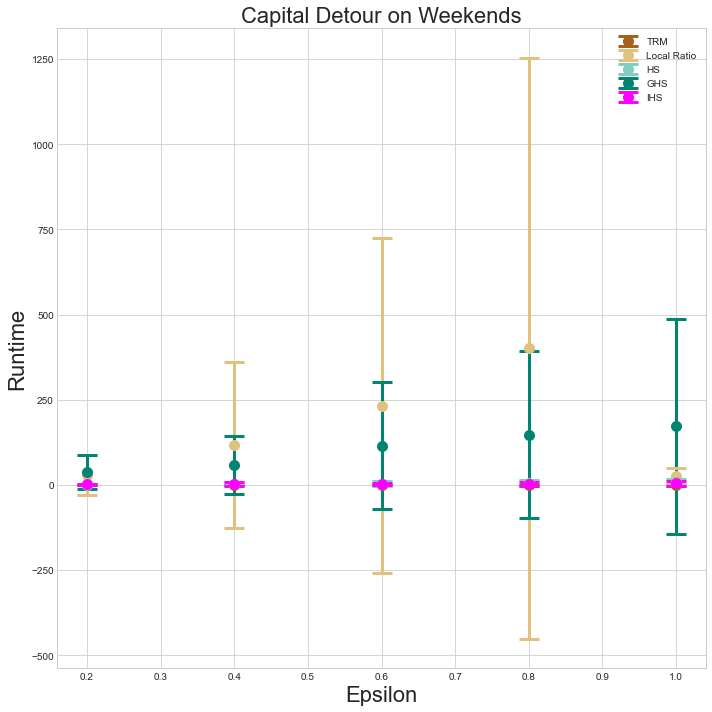

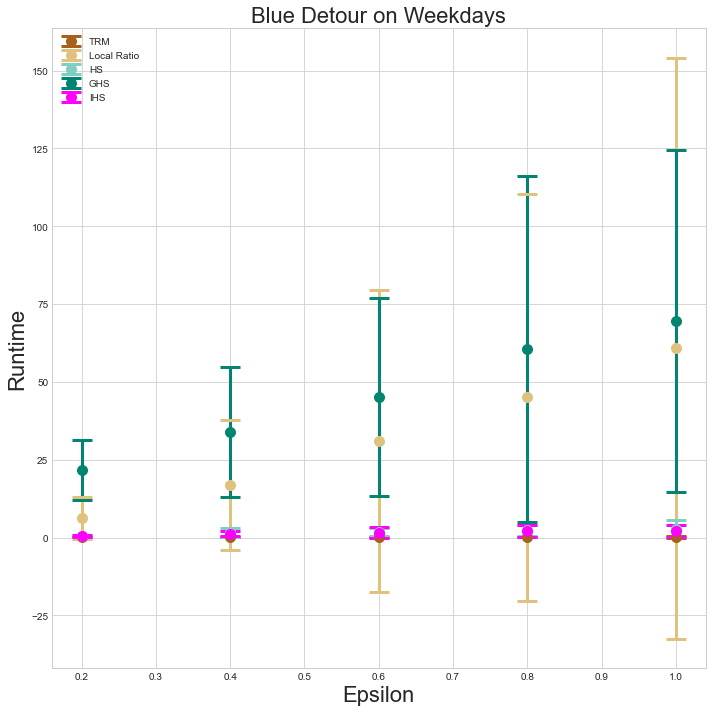

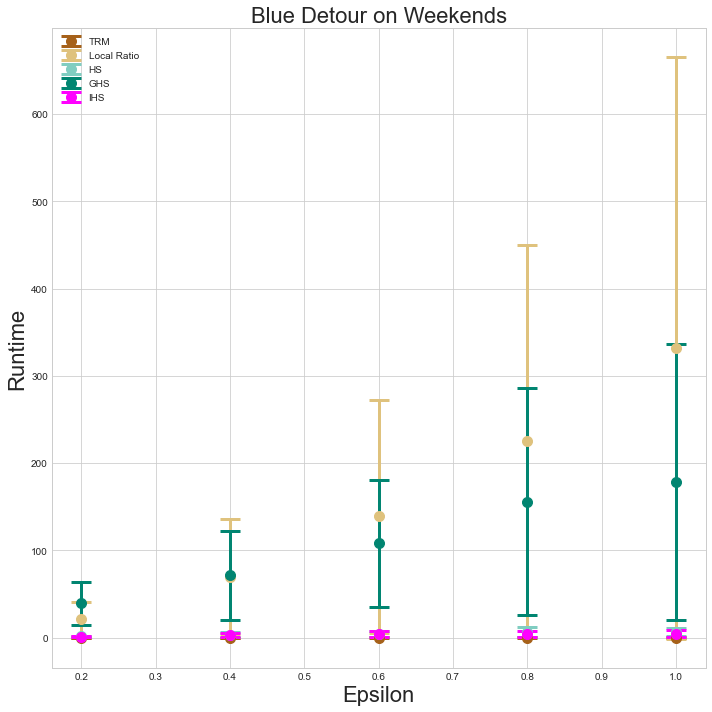

In [7]:
font = {'size'   : 22}
plt.style.use('seaborn-whitegrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571','#FF00FF']
color = 0
for source in sources:
    for day in ['weekday','weekend']:
        plt.style.use('seaborn-whitegrid')
        temp_df, det_cols = get_det_group(source,day)
        group = temp_df.groupby('epsilon')
        fig, ax = plt.subplots()
    

        for c in det_cols: 
            ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=c.split('_')[0],fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
            color +=1
        color = 0
        plt.title(source.capitalize() +' Detour on '+day.capitalize()+'s',**font)
        plt.legend()
        ax.set_ylabel('Increase in percent distance',**font)
        ax.set_xlabel('Epsilon',**font)
        fig.set_size_inches(10, 10)
        
        fig.tight_layout()
        fig.savefig('figures/'+source+'_'+day+'scores15')
        plt.show()
        
for source in sources:
    for day in ['weekday','weekend']:
        plt.style.use('seaborn-whitegrid')
        fig, ax = plt.subplots()
        group = df.loc[(df.source == source) & (df.day==day)].groupby('epsilon')
        for c in rt_cols: 
            ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=c.split('_')[0],fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
            color +=1
        color = 0
        plt.title(source.capitalize()+' Detour on '+day.capitalize()+'s',**font)
        ax.set_ylabel('Runtime',**font)
        ax.set_xlabel('Epsilon',**font)
        fig.set_size_inches(10, 10)
        fig.tight_layout()
        plt.legend()
        fig.savefig('figures/'+source+'_'+day+'rt15')
        plt.show()

In [8]:
day='weekday'
latex,det_cols = get_det_group(sources[0],day)
latex = latex.groupby('epsilon').mean()
if len(sources)>1:
    for source in sources[1:]:
        latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['epsilon']].groupby('epsilon').mean().astype(int))

for source in sources:
    latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['epsilon']].groupby('epsilon').mean().astype(int))

In [9]:
for day in ['weekend','weekday']
for source in sources:
    latex,det_cols = get_det_group(sources,day)
    print

SyntaxError: invalid syntax (<ipython-input-9-c9e71c65264d>, line 1)

In [54]:
temp_agg = pd.DataFrame()

for source in sources:
    temp_=pd.DataFrame(columns=['TRMciti',  'Local Ratiociti', 'HSciti', 'GHSciti','IHSciti', 'TRMcapital' ,
                            'Local Ratiocapital' ,  'HScapital' ,  'GHScapital' ,  'IHScapital' ,  'TRMblue',
                            'Local Ratioblue' ,  'HSblue' ,  'GHSblue' ,  'IHSblue' ])
    for day in ['weekend','weekday']:
        temp = get_det_group(source,day)[0].groupby('epsilon').mean()
        temp.index = [str(i)+' '+day.capitalize() for i in temp.index]
        temp.columns = [c.split('_')[0]+source for c in temp.columns]
        temp_=temp_.append(temp)
        print(temp_)
    for c in temp.columns:
        temp_agg[c]=np.round(temp_[c].values,2)

temp_agg.index = [1,.8,.6,.4,.2]+[1,.8,.6,.4,.2]
for i in range(len(temp_agg.index)):
    for j in [0,5,10]:
        temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)] = '\\textbf{'+str(temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)])+'}'

latex = temp_agg.to_latex()
latex = latex.replace('\\textbackslash textbf\\{','\\textbf{').replace('\\}','}')
print(latex)

              TRMciti  Local Ratiociti    HSciti   GHSciti   IHSciti  \
0.2 Weekend  0.253784         0.205866  0.197942  0.191899  0.196067   
0.4 Weekend  0.295653         0.272679  0.264382  0.276128  0.267680   
0.6 Weekend  0.167360         0.154756  0.181238  0.156924  0.159856   
0.8 Weekend  0.119588         0.109358  0.111972  0.111154  0.112221   
1.0 Weekend  0.100621         0.085966  0.094761  0.096496  0.096562   

            TRMcapital Local Ratiocapital HScapital GHScapital IHScapital  \
0.2 Weekend        NaN                NaN       NaN        NaN        NaN   
0.4 Weekend        NaN                NaN       NaN        NaN        NaN   
0.6 Weekend        NaN                NaN       NaN        NaN        NaN   
0.8 Weekend        NaN                NaN       NaN        NaN        NaN   
1.0 Weekend        NaN                NaN       NaN        NaN        NaN   

            TRMblue Local Ratioblue HSblue GHSblue IHSblue  
0.2 Weekend     NaN             NaN    NaN 

In [59]:

temp_agg = pd.DataFrame()

for source in sources:
    temp_=pd.DataFrame(columns=['TRMciti',  'Local Ratiociti', 'HSciti', 'GHSciti','IHSciti', 'TRMcapital' ,
                            'Local Ratiocapital' ,  'HScapital' ,  'GHScapital' ,  'IHScapital' ,  'TRMblue',
                            'Local Ratioblue' ,  'HSblue' ,  'GHSblue' ,  'IHSblue' ])
    for day in ['weekend','weekday']:
        temp = df.loc[(df.source == source) & (df.day==day),['epsilon']+rt_cols].groupby('epsilon').mean()
        temp.index = [str(i)+' '+day.capitalize() for i in temp.index]
        temp.columns = [c.split('_')[0]+source for c in temp.columns]
        temp_=temp_.append(temp)
        print(temp_)
    for c in temp.columns:
        temp_agg[c]=np.round(temp_[c].values,2)

temp_agg.index = [1,.8,.6,.4,.2]+[1,.8,.6,.4,.2]
print(temp_agg)
for i in range(len(temp_agg.index)):
    for j in [0,5,10]:
        print(temp_agg.iloc[i,range(j,j+5)].values)
        temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)] = '\\textbf{'+str(temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)])+'}'

latex = temp_agg.to_latex()
latex = latex.replace('\\textbackslash textbf\\{','\\textbf{').replace('\\}','}')
print(latex)

              TRMciti  Local Ratiociti    HSciti     GHSciti   IHSciti  \
0.2 Weekend  0.055434        29.693267  1.830014   34.749080  1.092562   
0.4 Weekend  0.102246       110.121153  4.189637   86.030918  2.683378   
0.6 Weekend  0.150918       216.952440  4.380952  104.873534  2.719910   
0.8 Weekend  0.227739       379.661119  6.117351  116.147061  3.070895   
1.0 Weekend  0.320309        46.223816  6.290985  211.856347  3.706272   

            TRMcapital Local Ratiocapital HScapital GHScapital IHScapital  \
0.2 Weekend        NaN                NaN       NaN        NaN        NaN   
0.4 Weekend        NaN                NaN       NaN        NaN        NaN   
0.6 Weekend        NaN                NaN       NaN        NaN        NaN   
0.8 Weekend        NaN                NaN       NaN        NaN        NaN   
1.0 Weekend        NaN                NaN       NaN        NaN        NaN   

            TRMblue Local Ratioblue HSblue GHSblue IHSblue  
0.2 Weekend     NaN            